# Algoritmo PCA

El algoritmo PCA (Análisis de Componentes Principales) permite encontrar una representación de baja dimensionalidad $\mathbf{y_i}$ que explica la varianza de los datos originales $\mathbf{x_i}$. 

\begin{align*}
\mathbf{y_i}=U^T (\mathbf{x_i}-\mu)\\
\tilde{\mathbf{x_i}}=U \mathbf{y_i} +\mu
\end{align*}

In [11]:
using LinearAlgebra; 
using MultivariateStats;
using Statistics;

X=[ 7  4  3;
    4  1  8; 
    6  3  5;
    8  6  1;
    8  5  7;
    7  2  9;
    5  3  3;
    9  5  8;
    7  4  5;
    8  2  2];
μ=mean!([1. 1. 1.],X)
X_m=(X.-μ)
M = fit(PCA, transpose(X_m),maxoutdim=2)
Yte = transform(M, transpose(X_m))
X_r=transpose(reconstruct(M, Yte)).+μ
E=norm(X-X_r)

2.5979517653630966

In [19]:
M

PCA(indim = 3, outdim = 2, principalratio = 0.9409505391500154)

Pattern matrix (unstandardized loadings):
──────────────────────
         PC1       PC2
──────────────────────
1  -0.395715  1.34028
2  -0.720434  1.26714
3   2.75651   0.523582
──────────────────────

Importance of components:
─────────────────────────────────────────────
                                PC1       PC2
─────────────────────────────────────────────
SS Loadings (Eigenvalues)  8.27394   3.67613
Variance explained         0.651492  0.289459
Cumulative variance        0.651492  0.940951
Proportion explained       0.692376  0.307624
Cumulative proportion      0.692376  1.0
─────────────────────────────────────────────

In [13]:
typeof(X_m)

Matrix{Float64} (alias for Array{Float64, 2})

In [16]:
values,vectors=eigen(cov(X_m));

In [20]:
U=[vectors[:,3] vectors[:,2]]
V=sort(values[2:3],rev=true)
U_s=sqrt.(V)'.*U

3×2 Matrix{Float64}:
 -0.395715  1.34028
 -0.720434  1.26714
  2.75651   0.523582

In [24]:
U

3×2 Matrix{Float64}:
 -0.137571  0.699037
 -0.25046   0.660889
  0.958303  0.27308

In [23]:
M.proj

3×2 Matrix{Float64}:
 -0.137571  0.699037
 -0.25046   0.660889
  0.958303  0.27308

In [21]:
imp=V./sum(V)
print("Proportion explained : $imp")

Proportion explained : [0.6923759694669046, 0.3076240305330955]

In [25]:
Y_t=transpose(U)*transpose(X_m)
X_r2=transpose(U*Y_t).+μ

10×3 Matrix{Float64}:
 7.07496  3.92443   2.99101
 4.35819  0.638889  7.95704
 6.18905  2.8094    4.97733
 8.4573   5.53896   0.945154
 8.31521  4.68222   6.9622
 6.43642  2.56818   9.06759
 5.56336  2.43204   2.93243
 8.88185  5.11912   8.01417
 7.19307  3.80535   4.97684
 6.53059  3.48141   2.17623

In [26]:
transpose(U)

2×3 transpose(::Matrix{Float64}) with eltype Float64:
 -0.137571  -0.25046   0.958303
  0.699037   0.660889  0.27308

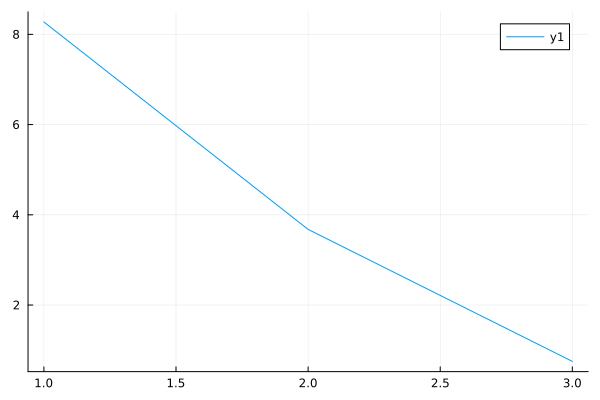

In [27]:
using Plots;

plot(sort(values,rev=true))

In [30]:
norm(X-X_r)

2.5979517653630966

# EigenFaces

En el caso del reconocimiento facial, el algoritmo Eigenfaces utiliza esta representación de baja dimensionalidad para comparar caras nuevas (no utilizadas para ajustar los valores y vectores propios). Sin embargo, una de los problemas al utlizar esta técnica es determinar la dimensionalidad \emph{intrinsica} de los datos. Esto quiere decir que el número de componentes principales es desconocido y debe determinarse mediante un compromiso entre el error de reconstrucción $E=\sum_i^n (\mathbf{x_i}-\tilde{\mathbf{x_i}})^2$ y la capacidad de comprimir y explicar los datos.

https://bio322.epfl.ch/notebooks/pca.html

In [213]:
using Images,Colors
using ImageTransformations

path="eigenvalue_pics/"
dim=64

function images_to_mat(pathlist,dim,data_type)
    mat=zeros(data_type,length(pathlist),dim*dim)
    for (index,images) in enumerate(pathlist)
        img=load(images)
        img_g=Gray.(img)
        img_g=imresize(img_g,dim,dim)
        img_g=255*data_type.(img_g)
        img_g=reshape(img_g,(1,dim*dim))
        mat[index,:]=img_g
    end 
    return mat
end



images_to_mat (generic function with 1 method)

In [214]:
pathlist=[]
names=[]
for d in readdir(path)
    for f in readdir(path*d)
        file_path=path*d*"/"*f
        push!(pathlist,file_path)
        push!(names,d)
    end 
end 

In [249]:
using LinearAlgebra; 
using MultivariateStats;
using Statistics;

my_type=Float32
mat=images_to_mat(pathlist,dim,my_type)
mean_face=mean!(transpose(ones(dim*dim)),mat)
centered_mat=mat.-my_type.(mean_face);

In [250]:
typeof(centered_mat)

Matrix{Float32} (alias for Array{Float32, 2})

In [251]:
values,vectors=eigen(cov(centered_mat));

In [252]:
sorted_values=sort(values,rev=true);

In [253]:
length(sorted_values)

4096

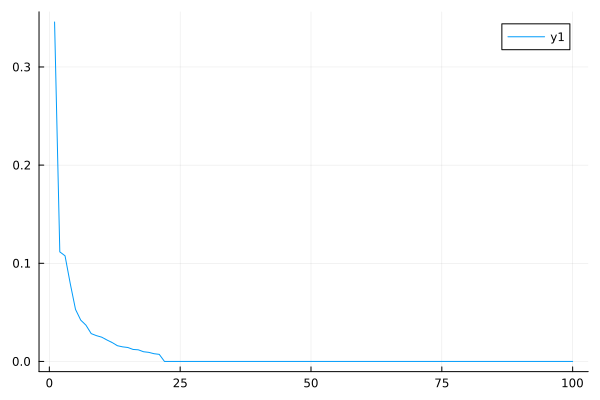

In [254]:
using Plots;

sorted_values=sorted_values./sum(sorted_values)
plot(sorted_values[1:100])

In [255]:
size(vectors)

(4096, 4096)

In [256]:
num_components=25

25

In [257]:
eigenfaces=vectors[:,dim*dim:-1:(dim*dim-num_components+1)];

In [258]:
size(eigenfaces)

(4096, 25)

In [267]:
P=transpose(eigenfaces)*transpose(centered_mat);

# Error de predicción

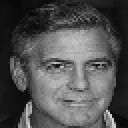

In [260]:
img=load("test.jpg")
img_g=Gray.(img)
img_g=imresize(img_g,dim,dim)

In [261]:
x_i=reshape(255*Float64.(img_g),(1,dim*dim))-mean_face
P_i=transpose(eigenfaces)*transpose(x_i);

In [262]:
size(P)

(25, 22)

In [263]:
dist=[]
for i in 1:22
    push!(dist,norm(P[:,i]-P_i))
end
pred=names[argmin(dist)]
print("La persona es : $pred")

La persona es : clooney

In [264]:
R=transpose(eigenfaces*P).+mean_face

22×4096 Matrix{Float64}:
 205.0     206.0     207.0     208.0     …   17.0019   27.9997   28.9999
  35.0004   36.0001   39.0001   43.0001      18.0002   20.0022   14.0
 153.0     147.0     133.0     126.0        151.0     127.0      99.0
  75.0      79.0001   83.0      88.0001      19.9996   14.0019    4.99988
  69.9999   74.0      75.0001   75.0         34.0002   39.0016   21.9997
 102.0     100.0      97.9997   95.9998  …  134.999   133.999   136.0
  74.9999   75.0001   76.0001   75.9999     105.0     111.0     117.0
  95.0003   97.0002   98.0001   98.0004     104.0     100.002    22.9999
 201.0     202.0     202.0     202.0        205.001   209.0       5.99989
  67.0001   67.0      68.0002   66.0         56.9985   68.0006  122.0
   ⋮                                     ⋱                        ⋮
 164.0     168.0     169.0     172.0        205.999   204.998   204.0
 138.0     139.0     139.0     141.0        219.999   220.998   221.0
 253.0     253.0     253.0     253.0     …   87.00

In [265]:
R_i=transpose(eigenfaces*P_i).+mean_face

1×4096 Matrix{Float64}:
 19.3948  20.5136  29.1645  18.3105  …  45.0657  7.42065  21.5123  58.2341

In [268]:
norm(mat-R)

0.02891347276806283

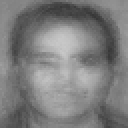

In [269]:
Gray.((reshape(mean_face,(dim,dim)))./255)

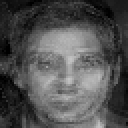

In [270]:
Gray.((reshape(R_i,(dim,dim)))./255)